# III Réseaux neuronaux

## 1. Simple population des neurones de taux 

Considérons une population de neurones décrits par leur taux de décharge moyen $r$. La population reçoit un input externe de force $I$. La dynamique du taux de décharge est donnée par 
$$\tau \frac{dr}{dt} = -r + \Phi(I).$$
La fonction de transfert suit un sigmoïde 
$$\Phi (x) = \frac{r_{\rm max}}{1 + \exp(−\beta(x − T))}.$$
<img src="Single_population.png" style="width: 200px;"/>
Considérons les paramètres: $I=1$, $\beta=0.2$, $r_{\rm max} = 100$, $T=40$.

### E1 Calculer analytiquement les points fixes du système. 
Les points fixes sont les points où la dérivée temporelle est égale à zéro, $ \frac{dr}{dt} = 0$, c'est-à-dire que le système est au repos, $ \frac{dr}{dt} = 0$. Combien de points fixes le système a-t-il? Tracer les points fixes en fonction de l'input externe $I$. Ce qui se passe si $\beta$ ou $T$ sont modifiés? Quelles propriétés du neurone sont incarnées par $\beta$ et $T$? 

## 2. Population de neurones excitateurs avec autapse

Considérons une population de neurones excitateurs décrits par leur taux de décharge moyen $r$. La population reçoit un apport externe de force I et se projette sur elle-même. La puissance de l'entrée récurrente est contrôlée par $J$. La dynamique du taux de décharge est donnée par 
$$\tau \frac{dr_E}{dt} = -r_E+ \Phi(r_E J_{EE}  + I).$$ 
La fonction de transfert suit un sigmoïde 
$$\Phi (x) = \frac{r_{\rm max}}{1 + \exp(−\beta(x − T))}.$$
<img src="E_population.png" style="width: 200px;"/>
Considérons les paramètres: $I=0$, $\beta=0.5$, $r_{\rm max} = 1$, $T=10$.

### E2 Analyse graphique des points fixes. 
Tracez $dr_E/dt$ en fonction de $r_E$ pour les valeurs suivantes de $J=0,10,16,20$ et $30$. D'après ce graph: Comment la nature (stable, instable) et le nombre de points fixes évoluent-ils? 

## 3. Population de neurones inhibiteurs avec autapse et retard

Considérons une population de neurones inhibiteurs décrits par leur taux de décharge moyen $r_I$. La population reçoit un apport externe de force $I$ et a des réactions récurrentes sur elle-même avec un retard de durée $D$. La puissance de l'entrée récurrente est contrôlée par $J_{II}$. La dynamique du taux de décharge est donnée par 
$$\tau \frac{dr_I}{dt} = -r_I+ \Phi(-J_{II} r_I(t-D)   + I).$$ 
La fonction de transfert suit un sigmoïde 
$$\Phi (x) = \frac{r_{\rm max}}{1 + \exp(−\beta(x − T))}.$$
<img src="I_population.png" style="width: 200px;"/>
Considérons les paramètres: $I=15$, $\beta=0.5$, $r_{\rm max} = 1$, $T=10$, $\tau = 0.1$, $D=0.05$.

### E3  Solution numérique de l'équation différentielle pour les neurones inhibiteurs. 

Intégrez numériquement l'équation différentielle pour le taux de décharge $r_I$. Utilisez le schéma d'intégration d'Euler et simulez la dynamique pour quatre valeurs différentes de J, $10,20,50$ et $100$. Qu'observez-vous? 


## 4. Réseau de neurones inhibiteurs d'Integrate-and-Fire à faible connexion

Dynamique d'un réseau de neurones inhibiteurs d'Integrate-and-Fire faiblement connectés. Les neurones individuels tirent irrégulièrement à faible taux, mais le réseau est soumis à un régime d'activité global oscillatoire où les neurones sont faiblement synchronisés.

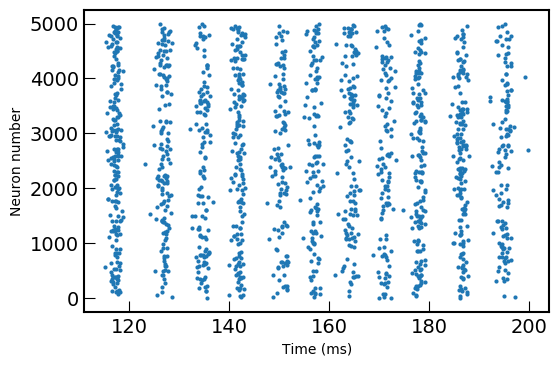

In [2]:
from brian import *
# paramètres réseau
N = 5000
Vr = 10 * mV
theta = 20 * mV
tau = 20 * ms
delta = 2 * ms
taurefr = 2 * ms
duration = .1 * second
C = 1000
sparseness = float(C)/N
J = 0.1 * mV
muext = 25 * mV
sigmaext = 1 * mV
# modèle neuronal
eqs = "dV/dt=(-V+muext+sigmaext*sqrt(tau)*xi)/tau : volt"
group = NeuronGroup(N, eqs, threshold=theta, reset=Vr, refractory=taurefr)
group.V = Vr
# Connections
conn = Connection(group, group, state='V', delay=delta,weight=-J, sparseness=sparseness)
# Moniteurs
M = SpikeMonitor(group)
#  
run(duration)
# Tracer
raster_plot(M)
show()